<a href="https://colab.research.google.com/github/danielhawkridge-essence/colab-notebooks/blob/main/3-image_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some code + images sourced from: https://github.com/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb

Image prediction is an example of how powerful machine learning has become.

In this notebook we're going to use a toy dataset called fashion mnist. It consists of pictures of clothes across 10 categories - T-shirt / tops, trousers, pullovers, dresses, coats, sandals, shirts, trainers, bags, and ankle boots. 

Our task is to build a image recognition model that can detect which fashion item we're showing the model.

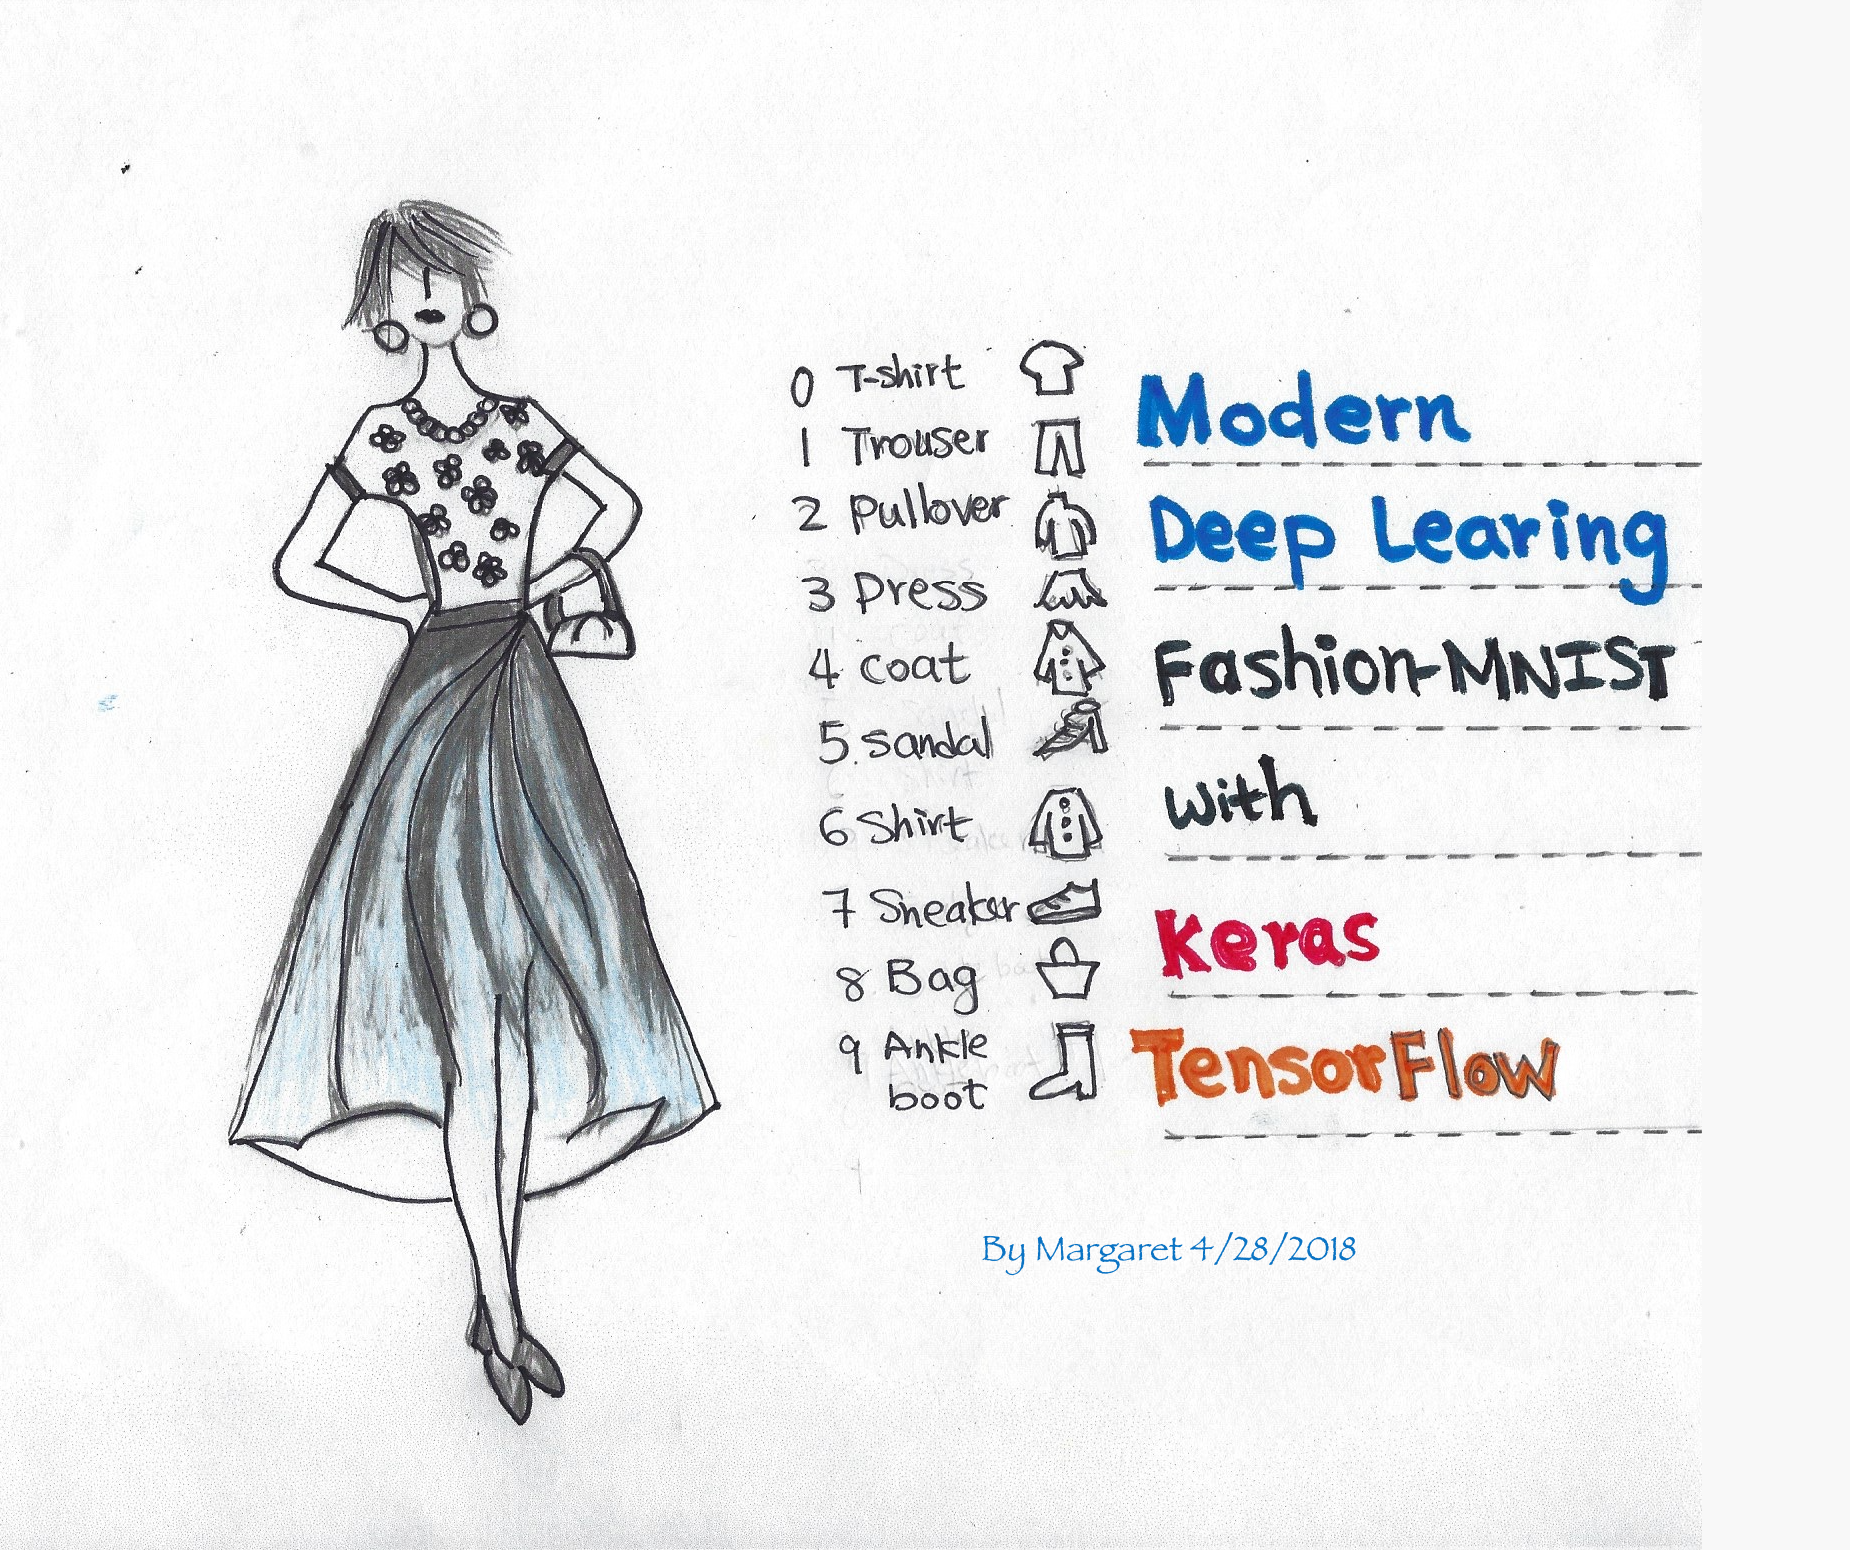

One of the most **amazing** parts of colab is that you can use hardware acceleration for free - giving you access to GPU or Google-only TPU (Tensor processing units) for your code. This hardware makes what we're about to do so much faster:

# DON'T MISS THIS STEP:

Go to Runtime > Change runtime type > Change from none to GPU


Ok, let's start coding. We're going to import tensorflow, a deep learning package (which will run our model), numpy to handle arrays, and matplotlib for plotting 

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


As we've seen from the diamond example, machine learning code **hates** words - all the labels are numeric. This will help us understand what the model is doing

In [ ]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

Next import the data

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Let's have a look at some images!

In [ ]:

# plot first few images
figure = plt.figure(figsize=(20, 8))
for index in range(15):
  ax = figure.add_subplot(3, 5, index + 1, xticks=[], yticks=[])
  # Display each image
  ax.imshow(np.squeeze(x_train[index]))
  ax.set_title("{}".format(fashion_mnist_labels[y_train[index]]))
# show the figure
plt.show()

These look hard! Lo-res images, and lots of similarity. Surely a model can't predict this well?

And the model we used for the diamond example won't work at all. What we need is a technique called deep learning: 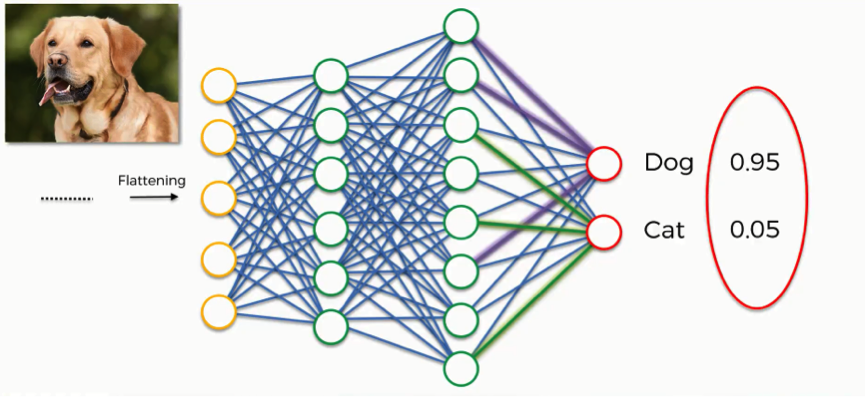

The below code builds our model structure - run the cell, then have a look at the output shapes - see how different layers influence the output shape

A Conv2D (Convolutional layer in 2 dimentions) runs a 2x2 block over the entire image. Look how the last element of the shape is the same as the number of filters

A MaxPooling2D layer takes the average of the above convolutions in a 2x2 pool. Look how a 28x28 image goes down to 14x14, then 7x7

Dropout layer randomly ignores a fraction of the filters (the last number of the output shape). It helps to generalise the model - we want it to learn what a t-shirt looks like, not a specific picture of a t-shirt, but ALL t-shirts...

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = tf.keras.Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

We reshape our data so it's in the form the model needs - 60000 by 28 by 28 by 1

In [ ]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

x_train.shape

This actually trains the model. Assuming you've set up a GPU runtime it'll take about a minute to run.

Each epoch is a full run through the training data. To make epochs faster and help with training, we show a little bit of the data at a time (the batch size). As each epoch happens you can see 2 bits of data

Loss - the value of sparse categorical crossentropy, a statistical test of how good the model is (if you like maths look it up, if not we want it low)
Accuracy - % it's got right in that epoch, higher is better


In [ ]:
#re-running this cell will start from where you left off - training the model more
BATCH_SIZE=2048
EPOCHS = 20

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
%time history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=1)

All done. Notice how the model started with big accuracy increases, then got progressively less good as time progressed? That's actually a good sign - it shows that we've controlled the complexity of our model well! A high accuracy score here is not useful, these numbers are based on **training data**. Let's see how it does on unseen test data:

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
test_accuracy

Was yours good? Was the loss and accuracy similar to the training dataset?

Let's visualise this now. Taking a random set of images from the train dataset let's predict and see if they are right or not:

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("""Predict: {} Actual: {} 
    Index: {}""".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index], index),
                                  color=("green" if predict_index == true_index else "red"))
plt.tight_layout()
plt.show()

How good was it? Are you impressed?

Let's look at one we got wrong. Pick an index from the plot above and let's look at the model prediction:



In [ ]:
index = 2359 #change me to a index above to see the prediction

y_hat = model.predict(x_test)

plt.imshow(np.squeeze(x_test[index]))
predict_index = np.argmax(y_hat[index])
true_index = y_test[index]
plt.title("""Predict: {} Actual: {} 
Index: {}""".format(fashion_mnist_labels[predict_index], 
                              fashion_mnist_labels[true_index], index),
                              color=("green" if predict_index == true_index else "red"))

plt.show()
chart = sns.barplot(x=fashion_mnist_labels, y=y_hat[index]*100)
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.ylabel("Probability %")
plt.xlabel("Type")
chart.set_xticklabels(chart.get_xticklabels(), rotation=40, ha="right")
plt.title("Type vs Probability")
plt.tight_layout()
plt.show()

**Could it be better?**
Yes! The record for this dataset is ~96%. If you've got time 

Decrease the batch size

Try increasing the epochs

Increase model complexity - more filters, more layers